In [9]:
import random

matriz_a = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
matriz_b = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for i in range(3):
  for j in range(3):
    matriz_a[i][j] = random.randint(1, 10)
    matriz_b[i][j] = random.randint(1, 10)

print()
print(matriz_a[0])
print(matriz_a[1])
print(matriz_a[2])
print()
print(matriz_b[0])
print(matriz_b[1])
print(matriz_b[2])

soma_a = matriz_a[1][0] + matriz_a[2][0] + matriz_a[2][1]
soma_b = matriz_b[0][1] + matriz_b[0][2] + matriz_b[1][2]

print()
print(soma_a)
print(soma_b)


[5, 7, 8]
[5, 1, 7]
[6, 5, 9]

[1, 1, 6]
[9, 8, 2]
[7, 4, 9]

16
9


In [10]:
import numpy as np

matriz_a = np.random.randint(10, size = (3, 3))

print(matriz_a)

det = np.linalg.det(matriz_a)

print(det)

[[2 2 2]
 [0 0 1]
 [0 4 2]]
-7.999999999999998


Uma pista de kart permite 10 voltas para cada um de 6 corredores. Faça um programa que defina aleatoriamente os tempos (em segundos) de cada volta de cada corredor. Ao final o programa deve informar:

- De quem foi a melhor volta e em que volta;
- Classificação final em ordem crescente;
- Quem foi o vencedor.

In [11]:
import numpy as np

num_voltas = 10
num_corredores = 6

tempos = np.random.randint(80, 121, size = (num_corredores, num_voltas))
tempos_totais = np.sum(tempos, axis = 1)

melhor_volta_indices = np.argmin(tempos, axis = 1)

melhores_tempos = tempos[np.arange(num_corredores), melhor_volta_indices]

classificacao_final_indices = np.argsort(tempos_totais)
classificacao_final = classificacao_final_indices + 1

vencedor_indice = np.argmin(tempos_totais)
vencedor = vencedor_indice + 1

print("Melhor volta de cada corredor:")
for i in range(num_corredores):
    print(f"Corredor {i + 1}: A melhor volta foi a {melhor_volta_indices[i] + 1} e o melhor tempo: {melhores_tempos[i]} segundos")

print("\nClassificação final:")

for posicao, corredor in enumerate(classificacao_final):
    print(f"{posicao + 1}º lugar: Corredor {corredor}")

print(f"\nO vencedor é o corredor {vencedor} com o tempo de {tempos_totais[vencedor_indice]} segundos.")

Melhor volta de cada corredor:
Corredor 1: A melhor volta foi a 2 e o melhor tempo: 85 segundos
Corredor 2: A melhor volta foi a 1 e o melhor tempo: 84 segundos
Corredor 3: A melhor volta foi a 3 e o melhor tempo: 88 segundos
Corredor 4: A melhor volta foi a 4 e o melhor tempo: 86 segundos
Corredor 5: A melhor volta foi a 5 e o melhor tempo: 82 segundos
Corredor 6: A melhor volta foi a 9 e o melhor tempo: 80 segundos

Classificação final:
1º lugar: Corredor 6
2º lugar: Corredor 5
3º lugar: Corredor 4
4º lugar: Corredor 1
5º lugar: Corredor 2
6º lugar: Corredor 3

O vencedor é o corredor 6 com o tempo de 939 segundos.


##Reescrever o exercício anterior utilizando a biblioteca Pandas

In [12]:
import numpy as np
import pandas as pd

num_voltas = 10
num_corredores = 6

tempos = np.random.randint(0, 121, size = (num_corredores, num_voltas))

df = pd.DataFrame(tempos)

df = pd.DataFrame(tempos, columns = range(1, 11))

df2 = df.rename(index = {0: 'Carlos', 1: 'Rafael', 2: 'Tomásia', 3: 'Alisson', 4: 'Jean', 5: 'Gabriela'})

df2

,1,2,3,4,5,6,7,8,9,10
Carlos,12,53,65,55,94,29,82,30,17,96
Rafael,90,24,108,75,94,88,0,55,81,31
Tomásia,79,85,44,74,59,8,1,37,45,95
Alisson,20,32,17,76,7,115,103,51,38,37
Jean,108,26,75,87,2,55,46,49,109,63
Gabriela,102,66,70,8,16,112,31,17,88,19


In [13]:
melhor_volta = df2.sum(axis = 1).sort_values()

melhor_volta

Alisson     496
Tomásia     527
Gabriela    529
Carlos      533
Jean        620
Rafael      646
dtype: int64

In [14]:
indice_melhor_volta = df2.idxmin(axis = 1)

print(indice_melhor_volta)

Carlos      1
Rafael      7
Tomásia     7
Alisson     5
Jean        5
Gabriela    4
dtype: int64


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

num_voltas = 10
num_corredores = 6

tempos = np.random.randint(0, 121, size = (num_corredores, num_voltas))

df = pd.DataFrame(tempos)

df.index = df.index + 1
df.columns = df.columns + 1

df

,1,2,3,4,5,6,7,8,9,10
1,26,70,110,6,49,34,26,98,120,100
2,32,1,67,39,55,82,68,43,109,3
3,54,113,47,75,7,35,26,81,3,0
4,102,62,82,84,12,17,29,43,67,69
5,107,48,16,118,48,110,5,37,28,57
6,86,46,34,107,89,54,108,86,41,103


In [16]:
dfacumulo = df.cumsum(axis = 1)

dfacumulo

,1,2,3,4,5,6,7,8,9,10
1,26,96,206,212,261,295,321,419,539,639
2,32,33,100,139,194,276,344,387,496,499
3,54,167,214,289,296,331,357,438,441,441
4,102,164,246,330,342,359,388,431,498,567
5,107,155,171,289,337,447,452,489,517,574
6,86,132,166,273,362,416,524,610,651,754


In [17]:
df_transposed = dfacumulo.T

df_transposed

,1,2,3,4,5,6
1,26,32,54,102,107,86
2,96,33,167,164,155,132
3,206,100,214,246,171,166
4,212,139,289,330,289,273
5,261,194,296,342,337,362
6,295,276,331,359,447,416
7,321,344,357,388,452,524
8,419,387,438,431,489,610
9,539,496,441,498,517,651
10,639,499,441,567,574,754


In [18]:
df2 = df_transposed.rename(columns = {1: 'Carlos', 2: 'Rafael', 3: 'Tomásia', 4: 'Alisson', 5: 'Jean', 6: 'Gabriela'})

df2

,Carlos,Rafael,Tomásia,Alisson,Jean,Gabriela
1,26,32,54,102,107,86
2,96,33,167,164,155,132
3,206,100,214,246,171,166
4,212,139,289,330,289,273
5,261,194,296,342,337,362
6,295,276,331,359,447,416
7,321,344,357,388,452,524
8,419,387,438,431,489,610
9,539,496,441,498,517,651
10,639,499,441,567,574,754


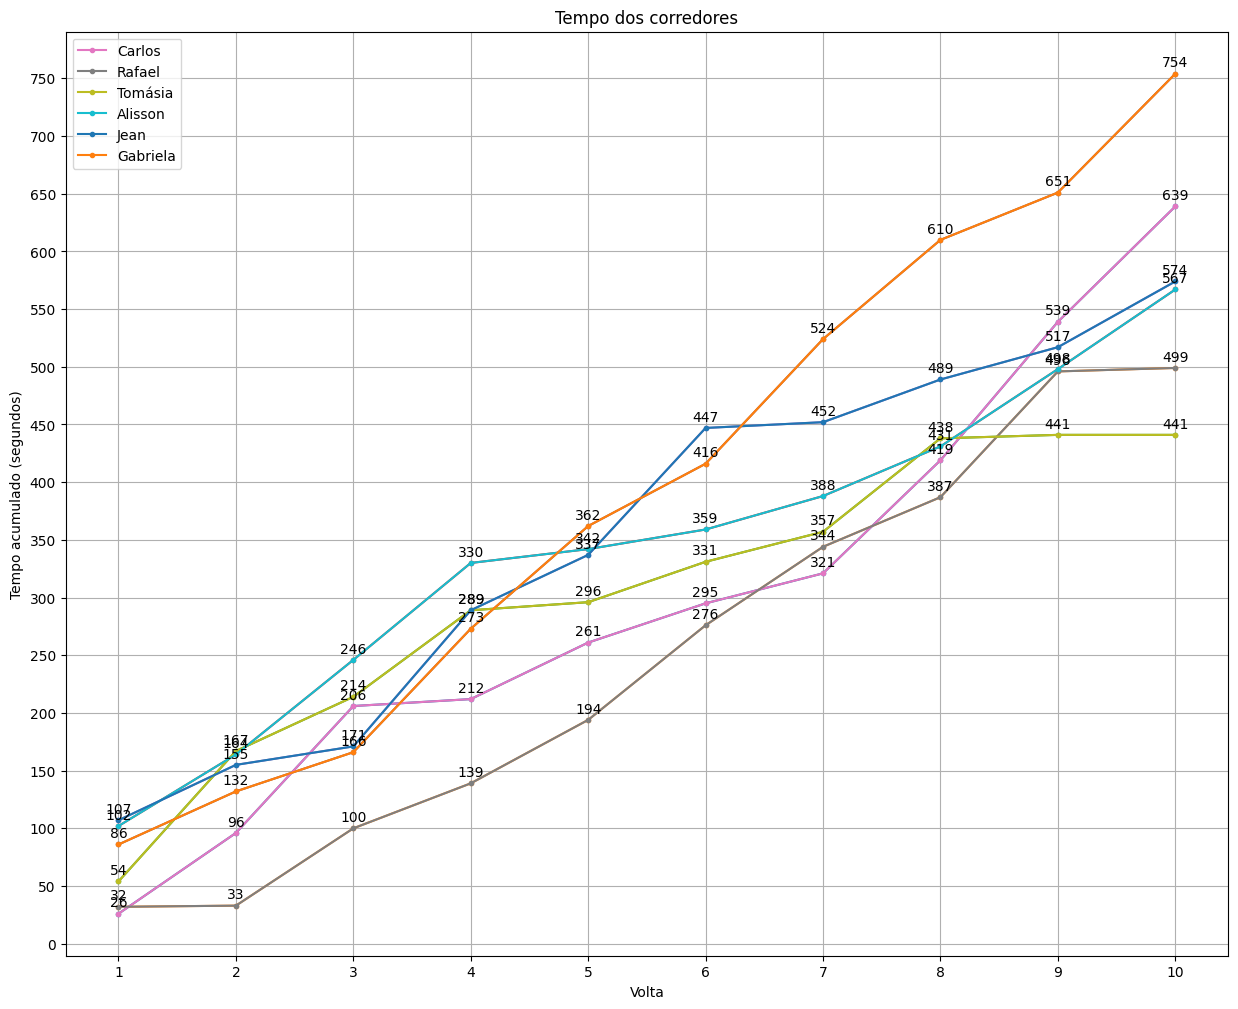

In [19]:
plt.figure(figsize = (15, 12))
plt.plot(df2.iloc[:], marker = '.')
plt.gca().yaxis.set_major_locator(MultipleLocator(50))
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for col in df2.columns:
    plt.plot(df2.index, df2[col], marker = '.', label = col)
    for i, value in enumerate(df2[col]):
        plt.annotate(value, (df2.index[i], value), textcoords = "offset points", xytext = (0, 5), ha = 'center')

plt.title('Tempo dos corredores')
plt.ylabel('Tempo acumulado (segundos)')
plt.xlabel('Volta')

plt.legend()
plt.grid(True)
plt.show()